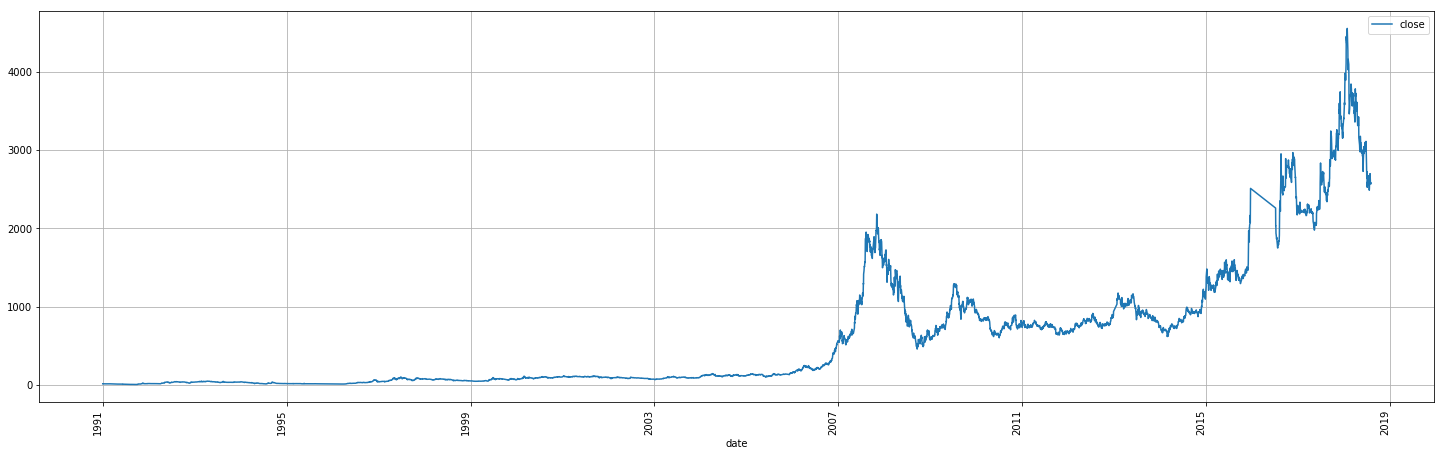

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import pandas as pd

df=ts.get_k_data('000002', autype='hfq',start='1900-01-01')
df['date'] =  pd.to_datetime(df['date'],format='%Y-%m-%d')
df.index=df['date']
df.index=df.index.strftime('%Y-%m-%d')
df
df.plot(kind='line', x='date',y=['close'],rot=90,grid=True,figsize=(25,8))

